# Importing Stuff

In [1]:
from HopfieldNetwork import *
import matplotlib.pyplot as plt

# Hopfield Network Energies

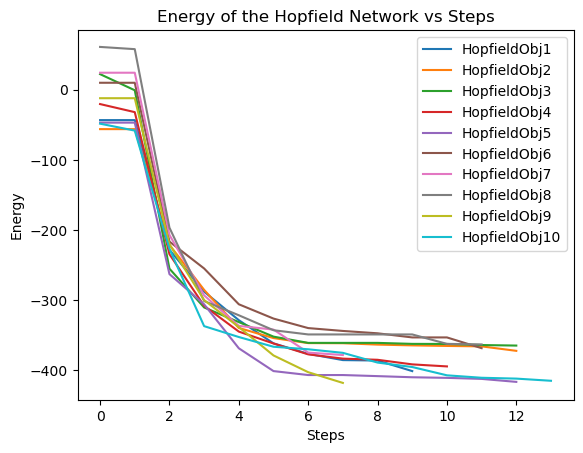

In [17]:
# Create 10 hopfieldNetworks each with different biases, weights, states
objects = []
for i in range(10):
	obj = HopfieldNetwork(size=10, name=f"hopfieldObj{i}")
	obj.initializeState()
	obj.initializeBiases()
	obj.initializeWeights()
	objects.append(obj)

# Compile a list of lists of all the energies of each of the class objects
allEnergies = []
for obj in objects:
	currEnergies = obj.run_simulation()
	allEnergies.append(currEnergies)

# Plot the energy of the Hopfield Network over time
plt.figure()
for i, energies in enumerate(allEnergies):
	steps = range(len(energies))
	plt.plot(steps, energies, label=f"HopfieldObj{i+1}")

plt.xlabel('Steps')
plt.ylabel('Energy')
plt.title('Energy of the Hopfield Network vs Steps')
plt.legend()
plt.show()

# Training some Inputs

This is the binary representation of the face


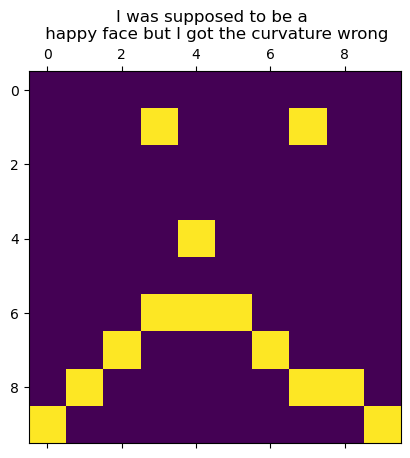

This is the binary representation of the tree


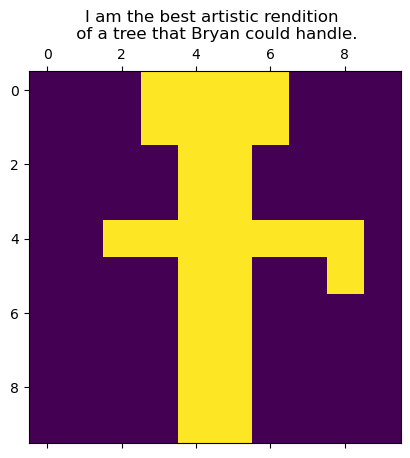

In [3]:
import makeImage
from TrainHopfieldNet import *

In [4]:
# Corrupt x percent of the state array that got from the image
def corruptImage(state, proportionToCorrupt):
    corruptArr = state.copy()
    partToCorrupt = int(len(state) * proportionToCorrupt)
    corruptArr[:partToCorrupt] = 1
    return corruptArr

def pertrubeImage(state, k):
    corruptArr = state.copy()
    for i in range(k):
        idx = np.random.randint(0, 99)
        corruptArr[idx] = 1
    return corruptArr

def stateToBinary(state):
    stateCpy = state.copy()
    for i in range(len(stateCpy)):
        if stateCpy[i] == -1:
            stateCpy[i] = 0
    myStr = ''.join(map(str, stateCpy))
    binaryNumber = int(myStr, 2)
    return binaryNumber

def isMatching(origBinaryVal, recoveredBinaryVal):
    if origBinaryVal == recoveredBinaryVal:
	    print(f"MATCH: Image after recovering corrupted_sadFace: {recoveredBinaryVal}, Image of the real sadFace: {origBinaryVal}")

    

Cell Below: Training a network on the real sadface and the tree images, and see if I can recover those images back, after corrupting the left 1/4(I just turned the values to a 1) of sadFaceState and treeState, and checking to see if they binary numbers are the same, as a test case

Step: 0


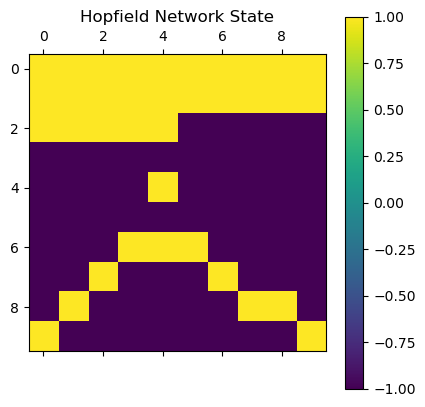

Step: 100


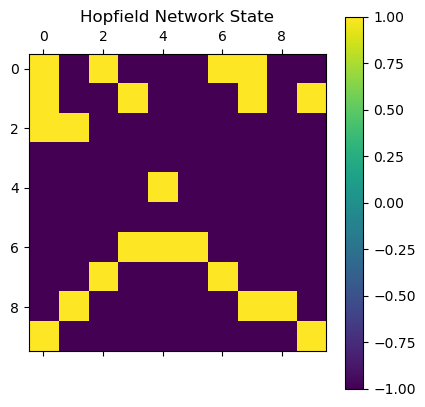

Step: 200


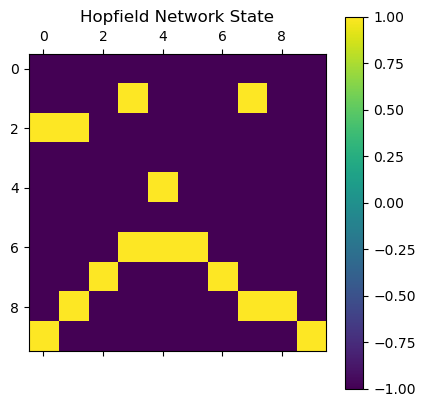

Step: 300


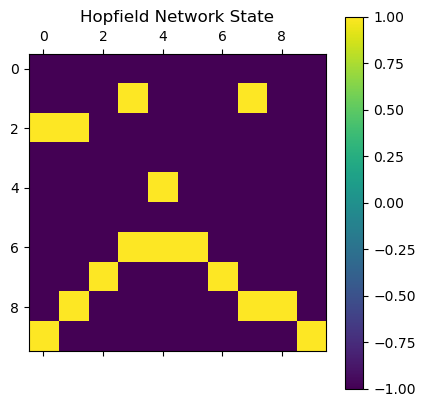

Step: 400


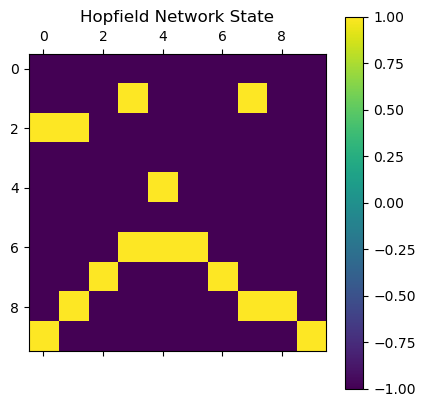

Step: 500


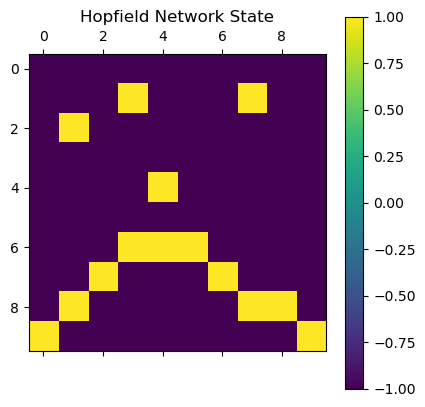

Step: 600


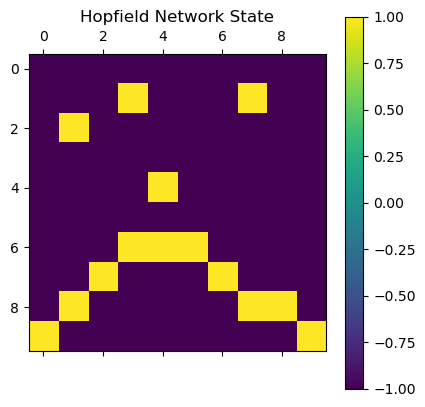

Step: 700


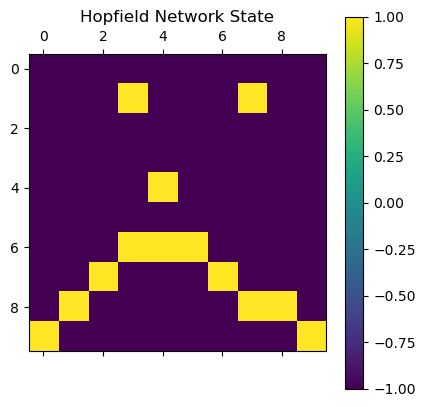

Step: 0


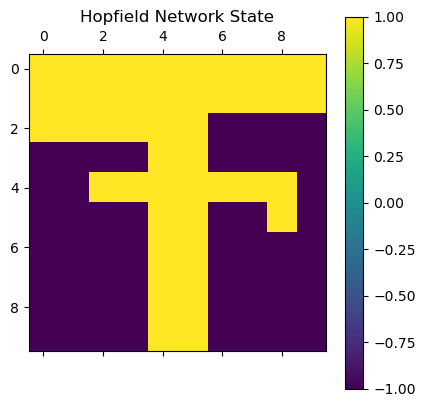

Step: 100


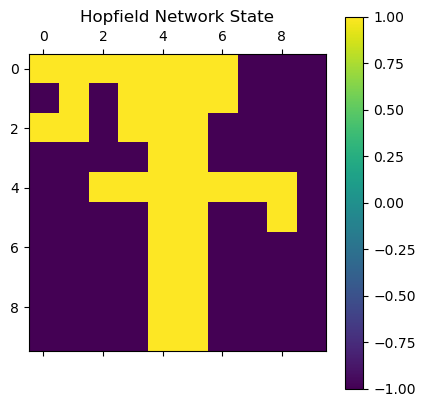

Step: 200


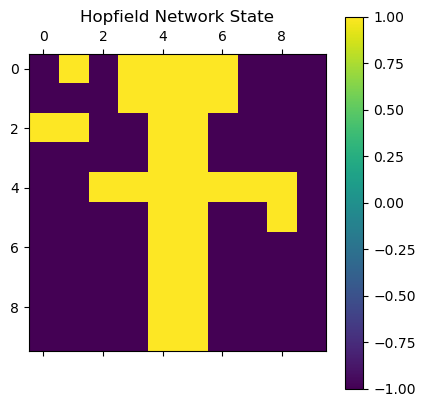

Step: 300


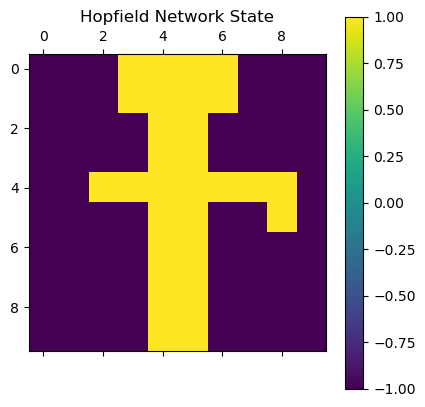

MATCH: Image after recovering corrupted_sadFace: 82206955769823701300943361, Image of the real sadFace: 82206955769823701300943361
MATCH: Image after recovering corrupted_sadFace: 148697932536623448749240270896, Image of the real sadFace: 148697932536623448749240270896


In [5]:
sadFace = makeImage.MakeFace()
tree = makeImage.MakeTree()
sadFaceState = makeImage.PrintImageNumber(sadFace)
treeState = makeImage.PrintImageNumber(tree)

# Train the network with the real sadface and tree images first(training really just setting weights, biases, based on matrix mul)
net1 = TrainHopfieldNet(state1=sadFaceState, state2=treeState)
net1.changeInputState() # Changes the 0 -> -1, 1 -> 1
net1.initializeBiases()
net1.initializeWeights()

# corrupt the left 1/4 the sadFace and tree image arrays
corrupted_sadFace = corruptImage(net1.state1, 0.25)
corrupted_tree = corruptImage(net1.state2, 0.25)

# Run simulations to see what we get our recovered images to be the real sadFace, tree
recovered_sadFace = net1.run_simulation(corrupted_sadFace)
recovered_tree = net1.run_simulation(corrupted_tree)

# TESTING: Check if the binaryNumbers match or not
orig_sadFace_BinaryNumber = stateToBinary(net1.state1)
recovered_sadFace_BinaryNumber = stateToBinary(recovered_sadFace)
isMatching(orig_sadFace_BinaryNumber, recovered_sadFace_BinaryNumber)
orig_tree_BinaryNumber = stateToBinary(net1.state2)
recovered_tree_BinaryNumber = stateToBinary(recovered_tree)
isMatching(orig_tree_BinaryNumber, recovered_tree_BinaryNumber)


Step: 0


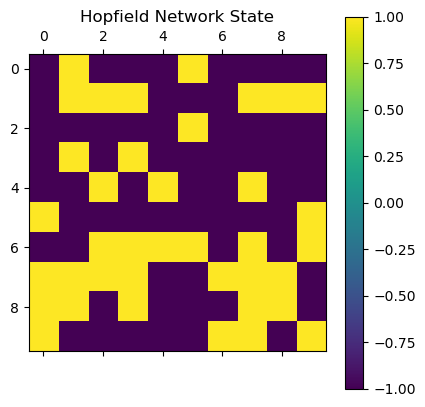

Step: 100


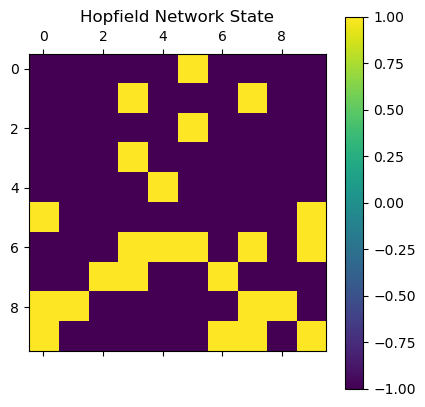

Step: 200


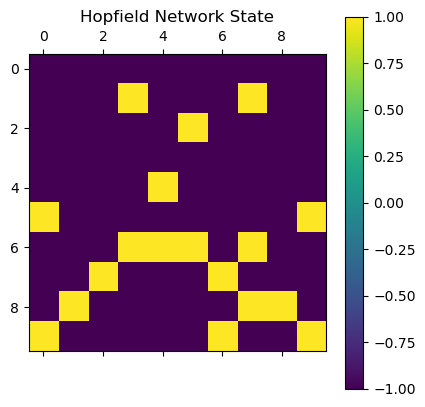

Step: 300


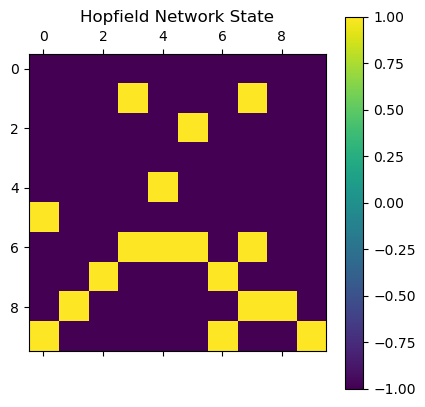

Step: 400


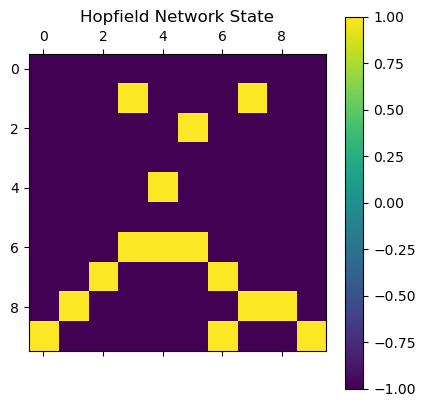

Step: 500


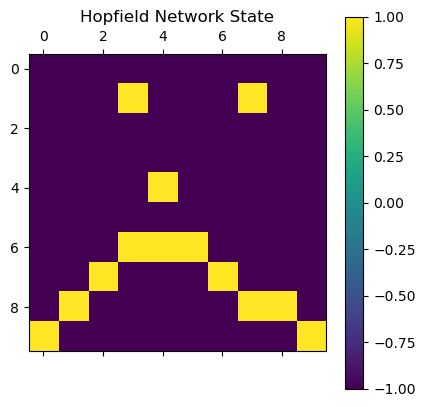

Step: 0


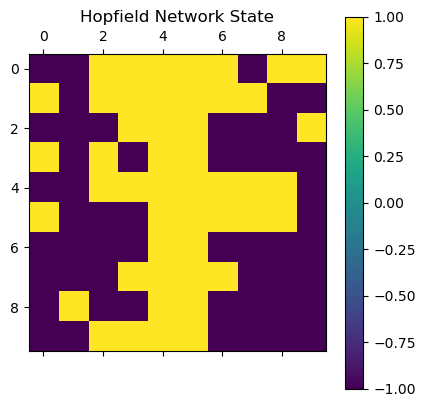

Step: 100


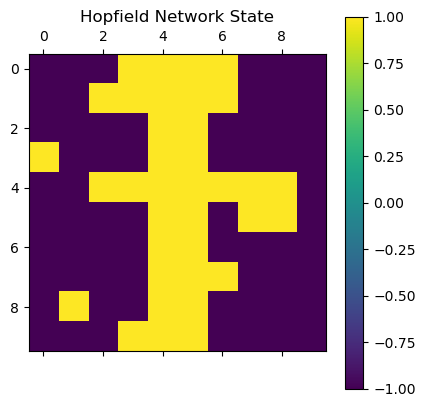

Step: 200


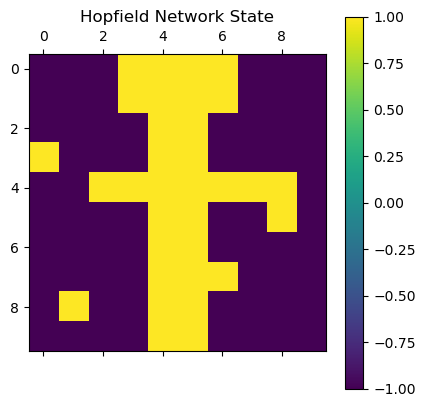

Step: 300


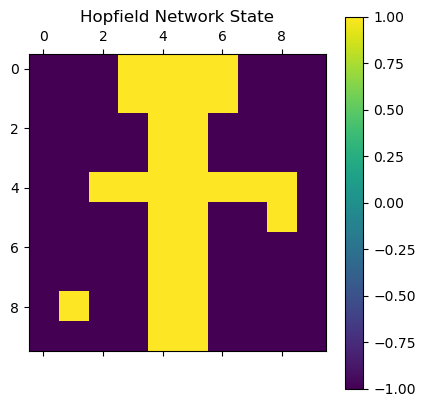

Step: 400


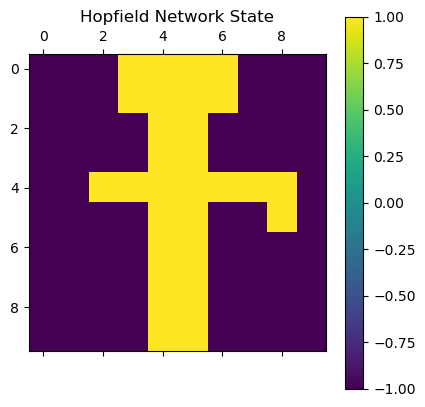

MATCH: Image after recovering corrupted_sadFace: 82206955769823701300943361, Image of the real sadFace: 82206955769823701300943361
MATCH: Image after recovering corrupted_sadFace: 148697932536623448749240270896, Image of the real sadFace: 148697932536623448749240270896


In [6]:
sadFace = makeImage.MakeFace()
tree = makeImage.MakeTree()
sadFaceState = makeImage.PrintImageNumber(sadFace)
treeState = makeImage.PrintImageNumber(tree)

net1 = TrainHopfieldNet(state1=sadFaceState, state2=treeState)
net1.changeInputState()
net1.initializeBiases()
net1.initializeWeights()

# randomly pick k=?? indexes and change them(pertrube)
pertrubed_sadFace = pertrubeImage(net1.state1, 30)
pertrubed_tree = pertrubeImage(net1.state2, 30)

recovered_sadFace = net1.run_simulation(pertrubed_sadFace)
recovered_tree = net1.run_simulation(pertrubed_tree)

orig_sadFace_BinaryNumber = stateToBinary(net1.state1)
recovered_sadFace_BinaryNumber = stateToBinary(recovered_sadFace)
isMatching(orig_sadFace_BinaryNumber, recovered_sadFace_BinaryNumber)
orig_tree_BinaryNumber = stateToBinary(net1.state2)
recovered_tree_BinaryNumber = stateToBinary(recovered_tree)
isMatching(orig_tree_BinaryNumber, recovered_tree_BinaryNumber)

# Number of Memories & Hamming Distance matrix

In [7]:
from HopfieldNetMain import *

In [8]:
def generateMemories(p):
    memories = []
    for i in range(p):
        memory = np.random.choice([-1, 1], size=(1, 100))
        memories.append(memory)
    return memories

def corruptMemory(memories, k):
    randIdx = np.random.randint(len(memories))
    corruptedMemory = memories[randIdx][0].copy()
    indicesToCorrupt = np.random.choice(len(corruptedMemory), k, replace=False)
    for i in indicesToCorrupt:
        corruptedMemory[i] = -corruptedMemory[i]
    return corruptedMemory, memories[randIdx][0]

def hamming_distance(a, b):
    return np.sum(a != b)



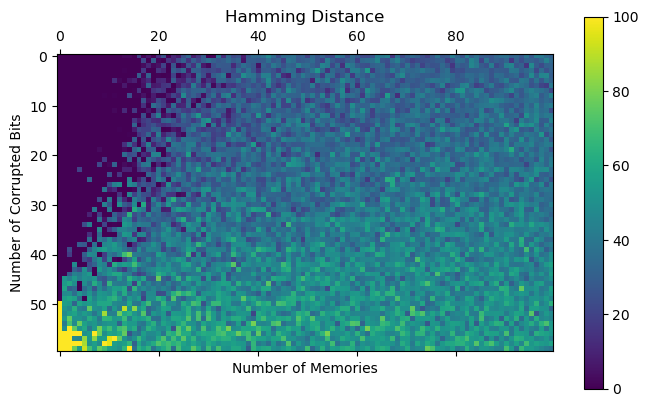

In [9]:
numOfMemories = 100
maxBitsFlipped = 60
hamming_matrix = np.zeros((maxBitsFlipped, numOfMemories))

for k in range(maxBitsFlipped):
	for p in range(1, numOfMemories + 1):
		# avg_distances = []
		# for _ in range(5):
		# Generate a i+1 memories and create a new Hopfield network
		memories = generateMemories(p)
		hopfieldNetwork = HopfieldNetMain(memories)
		hopfieldNetwork.setWeights()
		hopfieldNetwork.setBiases()

		corruptedMemory, originalMemory = corruptMemory(memories, k)
		recovered_memory = hopfieldNetwork.run_simulation(corruptedMemory)
		# avg_distances.append(hamming_distance(recovered_memory, originalMemory))
		dist = hamming_distance(recovered_memory, originalMemory)

		hamming_matrix[k][p-1] = dist

plt.matshow(hamming_matrix, cmap='viridis')
plt.colorbar()
plt.xlabel('Number of Memories')
plt.ylabel('Number of Corrupted Bits')
plt.title('Hamming Distance')
plt.show()


# Energy Landscape Diagram

In [1]:
from HopfieldNetDiagram import *
import graphviz
from graphviz import Digraph

In [3]:
def stateToBinary(state):
		state_list = list(state)
		state_list = [0 if x == -1 else 1 for x in state_list]
		state_str = ''.join(map(str, state_list))
		binary_number = int(state_str, 2)
		return binary_number

def generateMemories(p, neurons):
    memories = []
    for i in range(p):
        memory = np.random.choice([-1, 1], size=(1, neurons))
        memories.append(memory)
    return memories

def visualize_energy_landscape(graph, memory1Binary, memory2Binary):
    dot = Digraph(comment="Energy Landscape")
    for parent, neighbors in graph.items():
        if parent == memory1Binary or parent == memory2Binary:
            dot.node(str(parent), str(parent), style='filled', fillcolor='lightblue')
        else:
            dot.node(str(parent), str(parent))
        
        for neighbor in neighbors:
            dot.edge(str(neighbor), str(parent))
    
    dot.render('energy_landscape', format='svg', view=True)


In [12]:
neurons = 6
memories = generateMemories(2, neurons)
memory1 = memories[0][0]
memory2 = memories[1][0]

network = HopfieldNetDiagram(state1=memory1, state2=memory2)
network.changeInputState()
network.initializeBiases()
network.initializeWeights()
graph = network.buildGraph(neurons)

memory1Binary = stateToBinary(memory1)
memory2Binary = stateToBinary(memory2)

print(f"Memory1: {memory1}, in binary: {memory1Binary}")
print(f"Memory2: {memory2}, in binary: {memory2Binary}")

visualize_energy_landscape(graph, memory1Binary, memory2Binary)

Memory1: [-1  1 -1  1 -1 -1], in binary: 20
Memory2: [ 1  1  1  1 -1 -1], in binary: 60
